**Executed:** Sat Apr  8 15:23:35 2017

**Duration:** 77 seconds.

# Example - Burst Variance Analysis

*This notebook is part of smFRET burst analysis software [FRETBursts](http://tritemio.github.io/FRETBursts/).*

> This notebook shows how to implement Burst Variance Analysis (BVA) ([Torella 2011](http://dx.doi.org/10.1016/j.bpj.2011.01.066)) using FRETBursts.

> For a complete tutorial on burst analysis see 
> [FRETBursts - us-ALEX smFRET burst analysis](FRETBursts - us-ALEX smFRET burst analysis.ipynb).

# Loading the software

We start loading the **`FRETBursts`** software:

In [1]:
from fretbursts import *
sns = init_notebook()
from IPython.display import display

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.


--------------------------------------------------------------
 You are running FRETBursts (version 0.6.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


# Data file

In [2]:
from pathlib import Path

In [3]:
dir_ = '/Users/anto/Google Drive/notebooks/multispot_paper/realtime kinetics/data/'

In [4]:
file_list = [f for f in sorted(Path(dir_).glob('multispot_*'))]
file_list

[PosixPath('/Users/anto/Google Drive/notebooks/multispot_paper/realtime kinetics/data/multispot_2015-07-29_bubble-bubble-open-complex-run-off-kinetics-600mW-steer110_7.hdf5'),
 PosixPath('/Users/anto/Google Drive/notebooks/multispot_paper/realtime kinetics/data/multispot_2015-07-29_bubble-bubble-open-complex-run-off-kinetics-600mW-steer110_7_cache.hdf5'),
 PosixPath('/Users/anto/Google Drive/notebooks/multispot_paper/realtime kinetics/data/multispot_2015-07-30_bubble-bubble-run-off-kinetics-800mW-steer110_8.hdf5'),
 PosixPath('/Users/anto/Google Drive/notebooks/multispot_paper/realtime kinetics/data/multispot_2015-07-31_bubble-bubble-run-off-kinetics-800mW-steer110_12.hdf5')]

In [5]:
start_times = [600, 900, 900]  # time of NTP injection and start of kinetics

In [6]:
meas_id = 0
start_time = start_times[meas_id]

# Load the selected file

In [7]:
d = loader.photon_hdf5(file_list[meas_id])

# Burst Search and Selection

In [8]:
#d.calc_bg(bg.exp_fit, time_s=20, tail_min_us='auto', F_bg=1.7)

In [9]:
d.calc_bg_cache(bg.exp_fit, time_s=20, tail_min_us='auto', F_bg=1.7)

 * Loading BG rates from cache ... 


 - Loading bakground data: 

 [DONE]


In [10]:
d.bg

{Ph_sel(Dex='Aem', Aex=None): [array([ 5786.85781187,  5754.13864858,  5767.9107022 ,  5676.62488153,
          5604.24424714,  5745.92734791,  5696.75275313,  5662.02378618,
          5758.35527533,  5781.14893732,  5817.12539033,  5725.30475956,
          5775.50990889,  5791.02020467,  5729.40031472,  5766.66892409,
          5732.75934272,  5806.53581223,  5799.47833963,  5819.49593303,
          5825.43276776,  5866.68314583,  5747.26813677,  5807.47489736,
          5788.22140843,  5748.98089653,  5678.59094286,  5749.0724863 ,
          5792.72762873,  5784.29823534,  5591.0551903 ,  5496.32845945,
          5503.0522185 ,  5616.64779937,  5511.62799799,  5558.46343055,
          5588.44650939,  5581.99349202,  5533.43566726,  5551.59722449,
          5477.47200823,  5564.00326617,  5558.89409281,  5595.00156471,
          5562.96392671,  5647.13152644,  5604.0203354 ,  5543.33854512,
          5624.23337525,  5632.44315149,  5567.53642801,  5507.09793222,
          5567.8668693

In [11]:
d.calc_bg_cache(bg.exp_fit, time_s=20, tail_min_us='auto', F_bg=1.7)

 * Loading BG rates from cache ... 


 - Loading bakground data: 

 [DONE]


In [12]:
d.bg

{Ph_sel(Dex='Aem', Aex=None): [array([ 5786.85781187,  5754.13864858,  5767.9107022 ,  5676.62488153,
          5604.24424714,  5745.92734791,  5696.75275313,  5662.02378618,
          5758.35527533,  5781.14893732,  5817.12539033,  5725.30475956,
          5775.50990889,  5791.02020467,  5729.40031472,  5766.66892409,
          5732.75934272,  5806.53581223,  5799.47833963,  5819.49593303,
          5825.43276776,  5866.68314583,  5747.26813677,  5807.47489736,
          5788.22140843,  5748.98089653,  5678.59094286,  5749.0724863 ,
          5792.72762873,  5784.29823534,  5591.0551903 ,  5496.32845945,
          5503.0522185 ,  5616.64779937,  5511.62799799,  5558.46343055,
          5588.44650939,  5581.99349202,  5533.43566726,  5551.59722449,
          5477.47200823,  5564.00326617,  5558.89409281,  5595.00156471,
          5562.96392671,  5647.13152644,  5604.0203354 ,  5543.33854512,
          5624.23337525,  5632.44315149,  5567.53642801,  5507.09793222,
          5567.8668693

In [13]:
d.calc_bg_cache(bg.exp_fit, time_s=20, tail_min_us=(300, 500, 500), F_bg=1.7)

 * Loading BG rates from cache ... 


 - Loading bakground data: 

 [DONE]


In [14]:
d.calc_bg_cache(bg.exp_fit, time_s=20, tail_min_us=(300, 500, 500), F_bg=1.7)

 * Loading BG rates from cache ... 


 - Loading bakground data: 

 [DONE]


In [15]:
d.calc_bg_cache(bg.exp_fit, time_s=30, tail_min_us='auto', F_bg=1.7)

 * Loading BG rates from cache ... 


 - Loading bakground data: 

 [DONE]


In [16]:
d.calc_bg_cache(bg.exp_fit, time_s=30, tail_min_us='auto', F_bg=1.7)

 * Loading BG rates from cache ... 


 - Loading bakground data: 

 [DONE]


In [17]:
d.calc_bg_cache(bg.exp_fit, time_s=30, tail_min_us='auto', F_bg=2)

 * Loading BG rates from cache ... 


 - Loading bakground data: 

 [DONE]


In [18]:
d.calc_bg(bg.exp_fit, time_s=30, tail_min_us='auto', F_bg=1.7)

 - Calculating BG rates ... 

[DONE]


In [19]:
d.burst_search(m=10, computefret=False, ph_sel=Ph_sel(Dex='DAem'))

 - Performing burst search (verbose=False) ...

[DONE]


 - Calculating burst periods ...

[DONE]


In [20]:
d.bg

{Ph_sel(Dex='Aem', Aex=None): [array([ 5769.19253631,  5767.96684322,  5651.10323303,  5705.60806119,
          5685.49152738,  5728.17561372,  5806.41994102,  5741.73978101,
          5758.79358339,  5767.83532916,  5757.68157173,  5780.98049842,
          5830.91886163,  5796.91491172,  5825.37193493,  5786.64582701,
          5737.61794335,  5737.42953922,  5760.22525823,  5790.02187358,
          5551.62474777,  5502.87891998,  5589.31369003,  5536.22294639,
          5605.79206955,  5530.75072673,  5525.73620827,  5537.96057839,
          5566.81150268,  5578.17227214,  5628.22674047,  5564.33331321,
          5618.90674277,  5599.03113222,  5495.36823738,  5649.18635149,
          5573.92320304,  5522.80973191,  5454.07138886,  5599.41171542,
          5533.64113058,  5616.86516109,  5647.36886232,  5532.87529272,
          5604.34324854,  5596.92213216,  5542.60402381,  5528.92208436,
          5541.57641086,  5587.61755513,  5593.26139981,  5552.70294295,
          5533.2861982

In [21]:
d.TT[0].shape

(146,)

In [22]:
d.calc_bg_cache(bg.exp_fit, time_s=30, tail_min_us='auto', F_bg=1.7)

 * Loading BG rates from cache ... 


 - Loading bakground data: 

 [DONE]


In [23]:
d.burst_search(m=10, computefret=False, ph_sel=Ph_sel(Dex='DAem'))

 - Performing burst search (verbose=False) ...

[DONE]


 - Calculating burst periods ...

[DONE]


In [24]:
d.calc_fret(count_ph=True, corrections=False)

In [25]:
ds = d.select_bursts(select_bursts.size, th1=30, computefret=False)

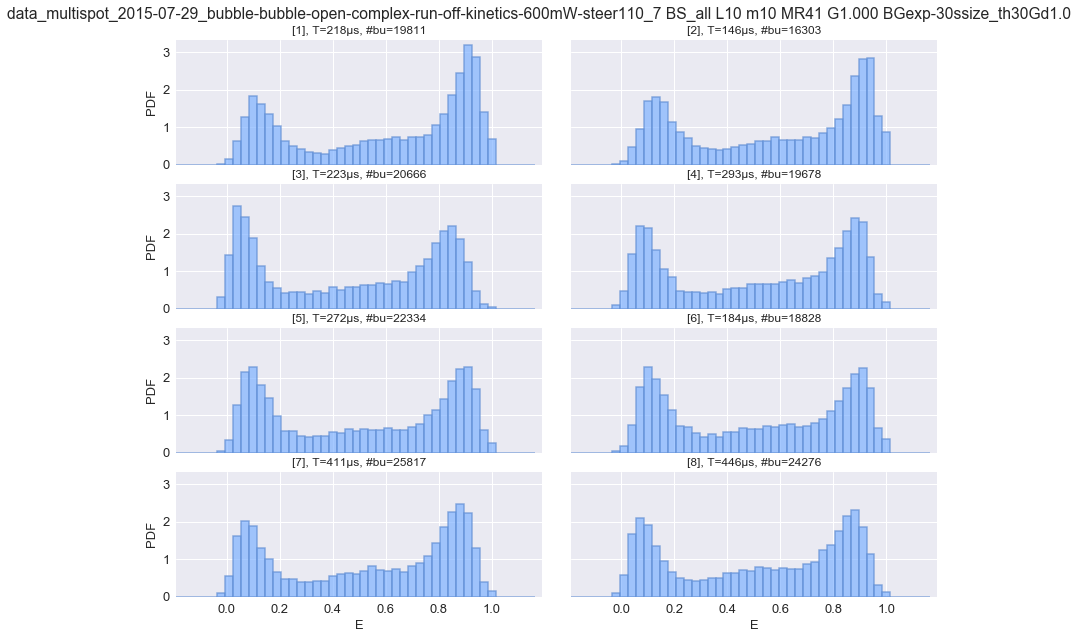

In [26]:
dplot(ds, hist_fret);

In [27]:
moving_window_params = dict(start=start_time-300, stop=start_time+600, step=60, window=60)
ds_slices = bext.moving_window_chunks(ds, time_zero=start_time, **moving_window_params)
startstop_list = bext.moving_window_startstop(**moving_window_params)
startstop_list

   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


   - Applying background correction.


   - Applying leakage correction.


[(300, 360),
 (360, 420),
 (420, 480),
 (480, 540),
 (540, 600),
 (600, 660),
 (660, 720),
 (720, 780),
 (780, 840),
 (840, 900),
 (900, 960),
 (960, 1020),
 (1020, 1080),
 (1080, 1140),
 (1140, 1200)]

# Burst Variance Analysis

We define a function to compute $s_E$:

In [28]:
def bva_sigma_E(n, bursts, DexAem_mask, out=None):
    """
    Perform BVA analysis computing std.dev. of E for sub-bursts in each burst.
    
    Split each burst in n-photons chunks (sub-bursts), compute E for each sub-burst,
    then compute std.dev. of E across the sub-bursts.

    For details on BVA see:

    - Torella et al. (2011) Biophys. J. doi.org/10.1016/j.bpj.2011.01.066
    - Ingargiola et al. (2016) bioRxiv, doi.org/10.1101/039198

    Arguments:
        n (int): number of photons in each sub-burst
        bursts (Bursts object): burst-data object with indexes relative 
            to the Dex photon stream.
        DexAem_mask (bool array): mask of A-emitted photons during D-excitation 
            periods. It is a boolean array indexing the array of Dex timestamps 
            (`Ph_sel(Dex='DAem')`).
        out (None or list): append the result to the passed list. If None,
            creates a new list. This is useful to accumulate data from
            different spots in a single list.

    Returns:
        E_sub_std (1D array): contains for each burst, the standard deviation of 
        sub-bursts FRET efficiency. Same length of input argument `bursts`.
    """
    E_sub_std = [] if out is None else out
    
    for burst in bursts:
        E_sub_bursts = []
        startlist = range(burst.istart, burst.istop + 2 - n, n)
        stoplist = [i + n for i in startlist]
        for start, stop in zip(startlist, stoplist):
            A_D = DexAem_mask[start:stop].sum()
            assert stop - start == n
            E = A_D / n
            E_sub_bursts.append(E)
        E_sub_std.append(np.std(E_sub_bursts))
        
    return E_sub_std

## BVA for each time-slice

In [29]:
# BVA number of photons
n = 7

In [30]:
len(ds_slices)

15

In [31]:
E_bva_slices = []
E_sub_std_slice = []
for dx in ds_slices:
    # We accumulate per-burst std-dev(E) for all spots in this list:
    E_sub_std = []
    for ph, bursts, Aem in zip(dx.iter_ph_times(), dx.mburst, 
                               dx.iter_ph_masks(Ph_sel(Dex='Aem'))):
        # In each cycle `ph`, `bursts` and `Aem` are respectively
        # timestamps, bursts and A-em mask for each spot

        # Compute std-dev(E) for each spot
        bva_sigma_E(n, bursts, Aem, out=E_sub_std)

    E_bva_slices.append(np.hstack([E for E in dx.E]))
    E_sub_std_slice.append(np.array(E_sub_std))

## Plots

In [32]:
from IPython.display import display
import matplotlib.gridspec as gridspec

In [33]:
len(E_bva_slices)

15

In [34]:
def _plot_circle(ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.arange(0,1.01,0.01)
    y = np.sqrt((x*(1-x))/n)
    ax.plot(x, y, lw=3, color='red')

def _set_axis(startstop, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_title('Time slice %s-%s s' % startstop)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(0,0.4)
    ax.set_xlabel('E', fontsize=18)
    ax.set_ylabel(r'$s_E$', fontsize=18);
    
def _fret_hist(E, ax=None):
    if ax is None:
        ax = plt.gca()
    bins = np.arange(-0.1, 1.1, 0.025)
    ax.hist(E, bins=bins, histtype='stepfilled')
    ax.set_xlabel('E', fontsize=16)

def _make_subplots():
    fig = plt.figure(figsize = (6, 7.5))
    gs = gridspec.GridSpec(2,1, height_ratios=(4, 1))
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=0.01)
    return fig, (ax1, ax2)

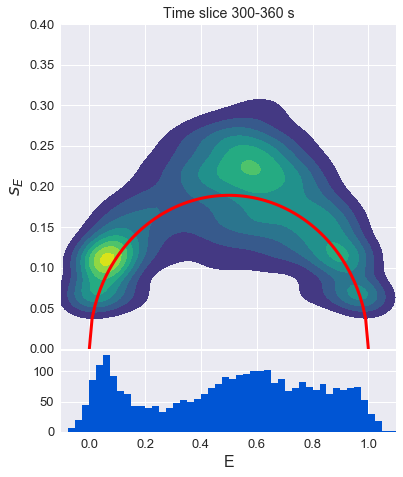

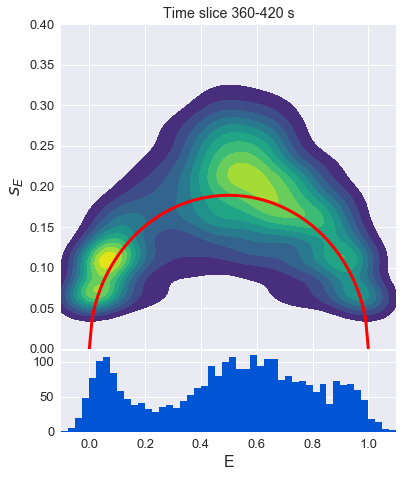

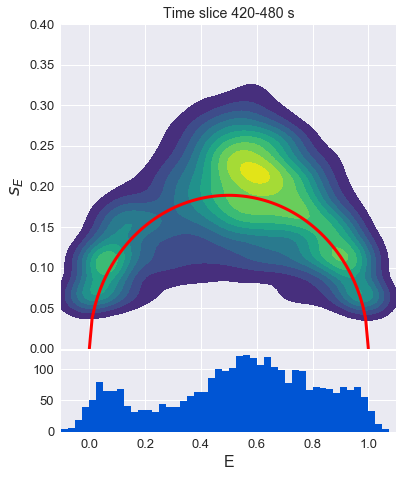

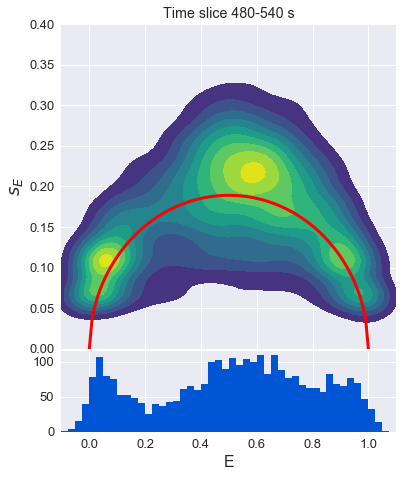

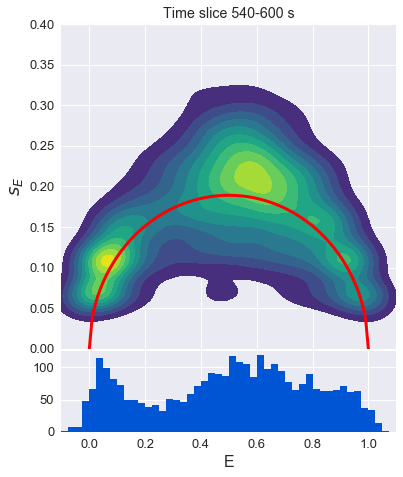

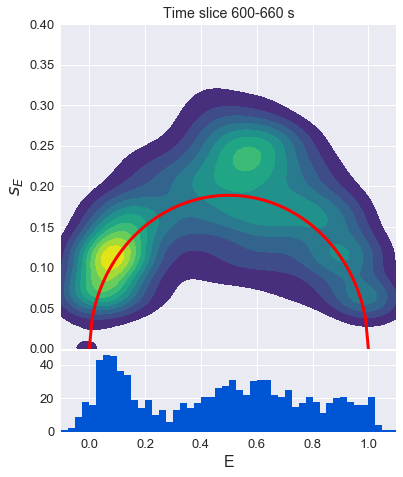

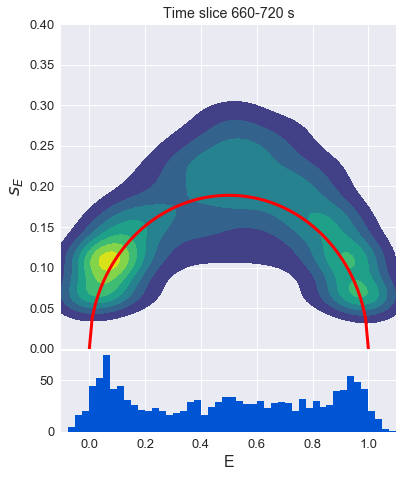

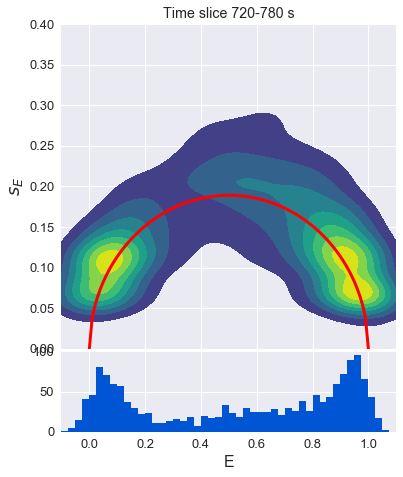

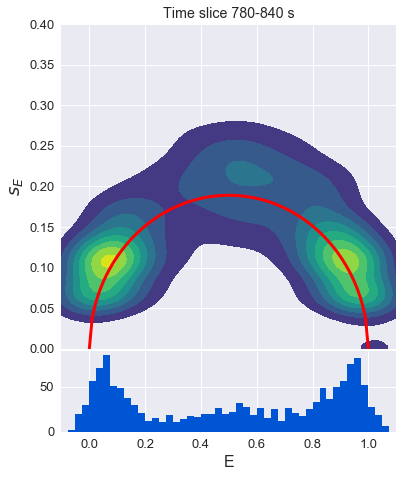

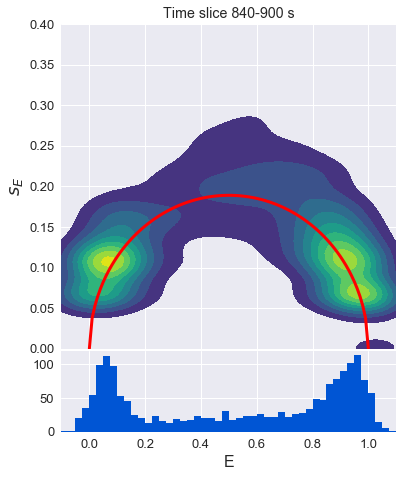

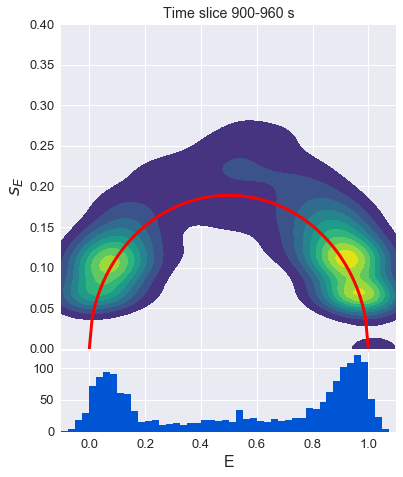

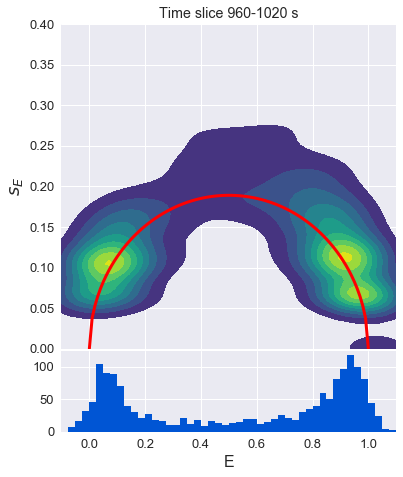

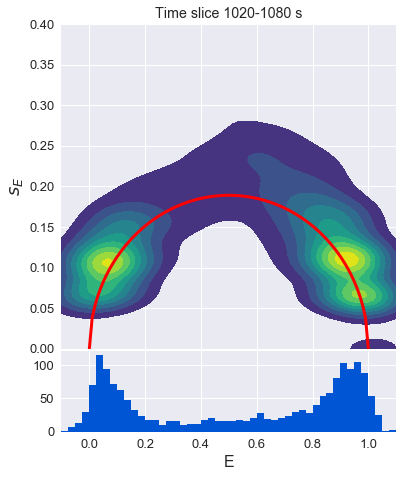

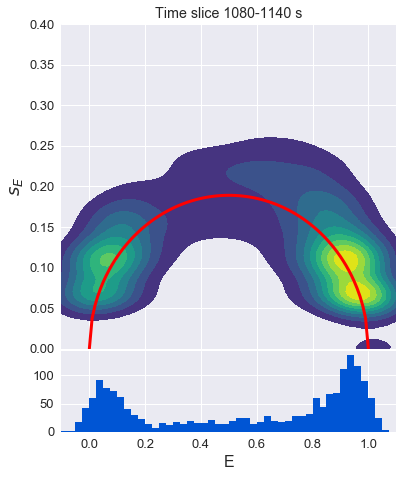

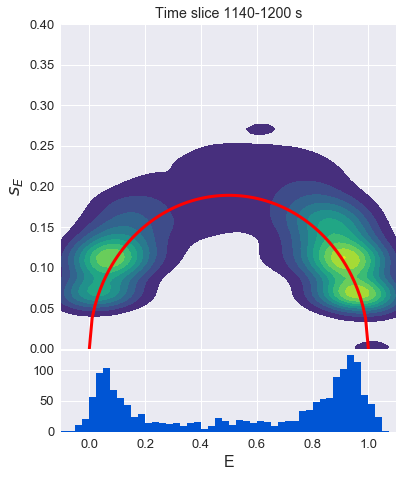

In [35]:
for E_bva, E_sub_std, startstop in zip(E_bva_slices, E_sub_std_slice, startstop_list):
    fig, ax = _make_subplots()
    _plot_circle(ax=ax[0])
    _fret_hist(E_bva, ax=ax[1])
    
    # Customize your BVA plot here
    im = sns.kdeplot(E_bva, E_sub_std, shade=True, cmap='viridis', shade_lowest=False, ax=ax[0])
    
    _set_axis(startstop, ax=ax[0])
    plt.close(fig)  # Close the figure to save memory in the loop
    display(fig)